<a href="https://colab.research.google.com/github/yurifillippo/Analises-Exploratorias-e-Python/blob/master/C%C3%B3pia_de_Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#Import dataset
df_train = pd.read_csv('/content/drive/MyDrive/Competições Kagle/Titanic/train.csv') 
df_test = pd.read_csv('/content/drive/MyDrive/Competições Kagle/Titanic/test.csv')

**Dicionário de Variáveis**

**PassengerId** - Identificação do passageiro

**Survived** - Sobrevivência (0 = Não, 1 = Sim) ** Variável Alvo

**Pclass** - Classe de ingresso

**Name** - Nome do Passageiro

**Sex** - Sexo do passageiro

**Age** - Idade do passageiro

**SibSp** - Quantidade de irmãos / cônjuges a bordo do Titanic

**Parch** - Quantidade de pais / filhos a bordo do Titanic

**Ticket** - Número do bilhete

**Fare** - Tarifa de passageiro

**Cabin** - Número da cabine

**Embarked** - Porto de embarcação


In [ ]:
#Ver tamanho do dataset
print(df_train.shape[0])

df_train.head(891)

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [ ]:
df_train.loc[df_train['Cabin'].isnull() == True].loc[df_train['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S


In [ ]:
#Criar novas feactures onde, CabineNull são os valores da variável Cabin que estão nulas, e os demais, nomenclaturas dos nomes dos passageiros
df_train['CabineNull'] = (df_train['Cabin'].isnull() == True).astype(int)
df_test['CabineNull'] = (df_test['Cabin'].isnull() == True).astype(int)

df_train['Miss'] = df_train['Name'].str.contains('Mrs').astype(int)
df_test['Miss'] = df_test['Name'].str.contains('Mrs').astype(int)

df_train['Mrs'] = df_train['Name'].str.contains('Mrs').astype(int)
df_test['Mrs'] = df_test['Name'].str.contains('Mrs').astype(int)

df_train['Mr'] = df_train['Name'].str.contains('Mr. ').astype(int)
df_test['Mr'] = df_test['Name'].str.contains('Mr. ').astype(int)

df_train['Master'] = df_train['Name'].str.contains('Master').astype(int)
df_test['Master'] = df_test['Name'].str.contains('Master').astype(int)

#df_train['Rev'] = df_train['Name'].str.contains('Rev. ').astype(int)
#df_test['Rev'] = df_test['Name'].str.contains('Rev. ').astype(int)

#df_train['Col'] = df_train['Name'].str.contains('Col. ').astype(int)
#df_test['Col'] = df_test['Name'].str.contains('Col. ').astype(int)

In [ ]:
df_train.shape

(891, 17)

In [ ]:
df_test.shape

(418, 16)

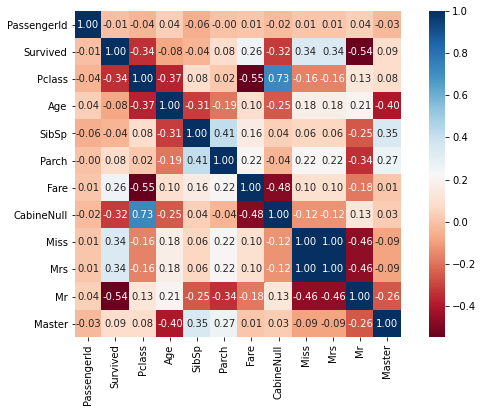

In [ ]:
#Antes de qualquer análise do dataset, vou buscar a correlação entre as variáveis para evitar tratamento em dados desnecessários
corr = df_train.corr()

#Plotar figure
fig, ax = plt.subplots(figsize=(10,6))

#Plotar heatmap de correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

In [ ]:
#Eliminar variáveis que não tem string e que não tem correlação
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
#Ver valores nulos
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Embarked       0.002245
CabineNull     0.000000
Miss           0.000000
Mrs            0.000000
Mr             0.000000
Master         0.000000
dtype: float64

In [ ]:
#Ver valores nulos
df_test.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.096521
SibSp          0.000000
Parch          0.000000
Fare           0.001122
Embarked       0.000000
CabineNull     0.000000
Miss           0.000000
Mrs            0.000000
Mr             0.000000
Master         0.000000
dtype: float64

In [ ]:
#Preenchendo valores nulos nos datasets

#Verificar média de idade dos passageiros por sexo, e Sobrevivente ou não, apos o resultado, preencher valores null na variável 'Age' no dataset df_train

#Mulher Morto - Média de idade
mmortasmed = df_train.loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'female')]['Age'].mean()
#Homem Morto - Média de idade
hmortosmed = df_train.loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'male')]['Age'].mean()
#Mulher Sobrevivente - Média de idade
msobrevmed = df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female')]['Age'].mean()
#Homem Sobrevivente - Média de idade
hsobrevmed = df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'male')]['Age'].mean()

#Substituir valores ausentes na variável 'Age'
df_train['Age'].loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'female')] = df_train['Age'].loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'female')].fillna(mmortasmed)
df_train['Age'].loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'male')] = df_train['Age'].loc[(df_train['Survived'] == 0) & (df_train['Sex'] == 'male')].fillna(hmortosmed)
df_train['Age'].loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female')] = df_train['Age'].loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female')].fillna(msobrevmed)
df_train['Age'].loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'male')] = df_train['Age'].loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'male')].fillna(hsobrevmed)

#Substituir dados na variável 'Age' de acordo com a média por sexo
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

#Substituir dados na variável 'Embarked' de acordo com o valor mais frequente no dataset df_train
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].value_counts()[0])

#Substituir dados na variável 'Fare' de acordo com a mediana no dataset df_test
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
#Alterar valores string das variáveis Embarked para avaliar a correlação de todos as variáveis novamente.
#df_train['Embarked'] = df_train['Embarked'].map({'S':1, 'C':2, 'Q':3, 644:1})
#df_test['Embarked'] = df_test['Embarked'].map({'S':1, 'C':2, 'Q':3})

df_train['EmbarkedS'] = (df_train['Embarked'] == 'S').astype(int)
df_test['EmbarkedS'] = (df_test['Embarked'] =='S').astype(int)
df_train['EmbarkedC'] = (df_train['Embarked'] == 'C').astype(int)
df_test['EmbarkedC'] = (df_test['Embarked'] == 'C').astype(int)


df_train = df_train.drop(['Embarked'], axis=1)
df_test = df_test.drop(['Embarked'], axis=1)

In [ ]:
#Alterar valores string das variáveis Sex para avaliar a correlação de todos as variáveis novamente.
df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':2})
df_test['Sex'] =df_test['Sex'].map({'male':1, 'female':2})

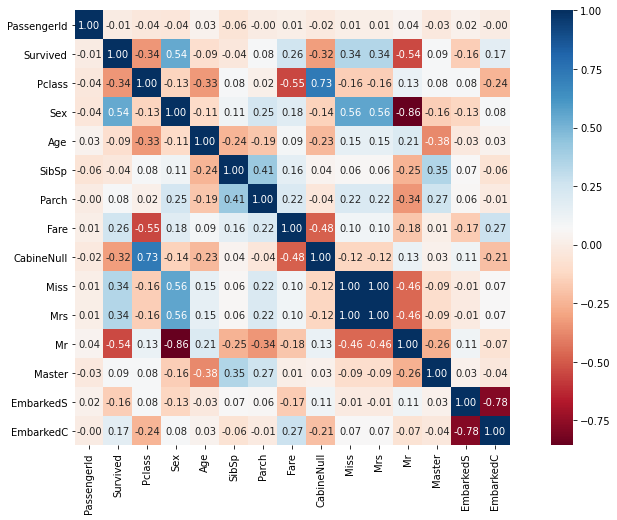

In [ ]:
#Antes de qualquer análise do dataset, vou buscar a correlação entre as variáveis para evitar tratamento em dados desnecessários
corr = df_train.corr()

#Plotar figure
fig, ax = plt.subplots(figsize=(15,8))

#Plotar heatmap de correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

In [ ]:
#Deixar variáveis: 'Pclass', 'Sex', 'Fare', pois, somente elas tem uma correlação significativa com a variável alvo
#df_train.drop(['Age', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)
#df_test.drop(['Age', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

#df_train.drop(['Age'], axis=1, inplace=True)
#df_test.drop(['Age'], axis=1, inplace=True)

In [ ]:
#Ajustar variáveis do dataset de teste
df_Id = df_test.copy()
df_test = df_test.drop(['PassengerId'], axis=1)

In [ ]:
#Dividir dataset de treino
y = df_train['Survived']
X = df_train.drop(['Survived', 'PassengerId'], axis=1)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

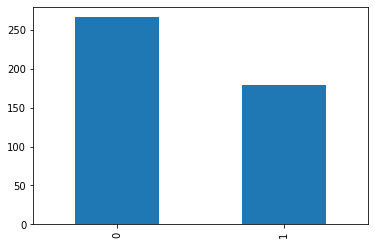

In [ ]:
y_train.value_counts().plot(kind='bar')

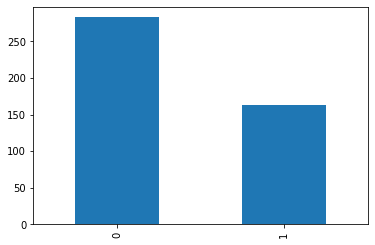

In [ ]:
y_test.value_counts().plot(kind='bar')

In [ ]:
#Criar modelo de arvore de decisão
#model = DecisionTreeClassifier('entropy', max_features=12, max_depth=10, min_samples_split=2 )
#model.fit(X_train,y_train)

In [ ]:
model = LogisticRegression(C=2.0, verbose=1, max_iter=500 )
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
# 4. Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
print("scores: ", scores)
print("Acurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores:  [0.86666667 0.77777778 0.82222222 0.84444444 0.8        0.81818182
 0.81818182 0.84090909 0.86363636 0.86363636]
Acurácia: 0.83 (+/- 0.06)


In [ ]:
#model = DecisionTreeClassifier()
#model.fit(X,y)

In [ ]:
####Testar outros algotitimos de uma só vez e usar otimização de parâmetros

In [ ]:
#Realizar previsão
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[240,  43],
       [ 38, 125]])

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       283
           1       0.74      0.77      0.76       163

    accuracy                           0.82       446
   macro avg       0.80      0.81      0.81       446
weighted avg       0.82      0.82      0.82       446



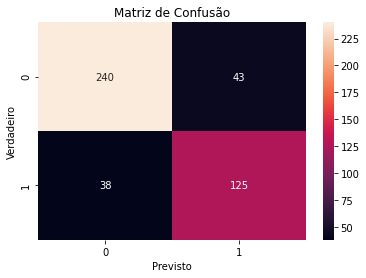

In [ ]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.4g', annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
y_pred2 = model.predict(df_test)

In [ ]:
gender_submission = pd.Series(y_pred2, index=df_Id['PassengerId'], name='Survived')

In [ ]:
gender_submission.to_csv('gender_submission', header=True)